In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Data Preprocessing
def preprocess_text(text):
    # Clean the text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and punctuation
    text = text.strip()  # Remove leading/trailing whitespaces

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package stopwords to /home/uan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/uan/nltk_data...


In [3]:
df = pd.read_csv('sorted_file.csv')

In [4]:
df.head()

,Tweet,Catogries,Keywords,Label,Class,Class_no
0,Death toll from Nuwakot jeep accident reaches ...,accident,death,1.0,Accidents and Incidents,NaN
1,"Nepal reports 1,714 cases as rapid antigen tes...",Covid,death,1.0,Public Health Emergencies,NaN
2,Nepal reports 180 cases as rapid antigen tests...,Covid,death,1.0,Public Health Emergencies,NaN
3,China’s zero-Covid drama China has attempted t...,Covid,pandemic,1.0,Public Health Emergencies,NaN
4,India verifying cause of deaths in Manipur aft...,Manmade,death,1.0,Human-Caused Disasters,NaN


In [5]:
df.drop(columns=['Catogries', 'Keywords','Class_no'], inplace=True)

In [6]:
df.head()

,Tweet,Label,Class
0,Death toll from Nuwakot jeep accident reaches ...,1.0,Accidents and Incidents
1,"Nepal reports 1,714 cases as rapid antigen tes...",1.0,Public Health Emergencies
2,Nepal reports 180 cases as rapid antigen tests...,1.0,Public Health Emergencies
3,China’s zero-Covid drama China has attempted t...,1.0,Public Health Emergencies
4,India verifying cause of deaths in Manipur aft...,1.0,Human-Caused Disasters


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()

In [11]:
df['label'] = label_encoder.fit_transform(df['Label'])

In [12]:
df.head()

,Tweet,Label,Class,label
0,Death toll from Nuwakot jeep accident reaches ...,1.0,Accidents and Incidents,1
1,"Nepal reports 1,714 cases as rapid antigen tes...",1.0,Public Health Emergencies,1
2,Nepal reports 180 cases as rapid antigen tests...,1.0,Public Health Emergencies,1
3,China’s zero-Covid drama China has attempted t...,1.0,Public Health Emergencies,1
4,India verifying cause of deaths in Manipur aft...,1.0,Human-Caused Disasters,1


In [13]:
df.drop(columns=['Label'], inplace=True)

In [14]:
df.head()

,Tweet,Class,label
0,Death toll from Nuwakot jeep accident reaches ...,Accidents and Incidents,1
1,"Nepal reports 1,714 cases as rapid antigen tes...",Public Health Emergencies,1
2,Nepal reports 180 cases as rapid antigen tests...,Public Health Emergencies,1
3,China’s zero-Covid drama China has attempted t...,Public Health Emergencies,1
4,India verifying cause of deaths in Manipur aft...,Human-Caused Disasters,1


In [16]:
df.shape

(5258, 3)

In [17]:
df = df[df['label'] != 0]

In [18]:
df.shape

(2282, 3)

In [19]:
df.drop(columns=['label'], inplace=True)

In [20]:
df.head()

,Tweet,Class
0,Death toll from Nuwakot jeep accident reaches ...,Accidents and Incidents
1,"Nepal reports 1,714 cases as rapid antigen tes...",Public Health Emergencies
2,Nepal reports 180 cases as rapid antigen tests...,Public Health Emergencies
3,China’s zero-Covid drama China has attempted t...,Public Health Emergencies
4,India verifying cause of deaths in Manipur aft...,Human-Caused Disasters


In [21]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
df.head()

,Tweet,Class
0,Raging inferno: Preventive and mitigation meas...,Natural Disasters
1,Floods continue to wreak havoc in Manang Marsh...,Natural Disasters
2,"Nepal reports 441 new Covid-19 cases, nine dea...",Public Health Emergencies
3,"The Chambas settlement in Gajuri 2, Dhading, i...",Human-Caused Disasters
4,Nepal reports 163 new Covid-19 cases According...,Public Health Emergencies


In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
df['preprocessed_text'] = df['Tweet'].apply(preprocess_text)

In [25]:
df.head()

,Tweet,Class,preprocessed_text
0,Raging inferno: Preventive and mitigation meas...,Natural Disasters,raging inferno preventive mitigation measure w...
1,Floods continue to wreak havoc in Manang Marsh...,Natural Disasters,flood continue wreak havoc manang marshyangdi ...
2,"Nepal reports 441 new Covid-19 cases, nine dea...",Public Health Emergencies,nepal report new covid case nine death accordi...
3,"The Chambas settlement in Gajuri 2, Dhading, i...",Human-Caused Disasters,chambas settlement gajuri dhading risk landsli...
4,Nepal reports 163 new Covid-19 cases According...,Public Health Emergencies,nepal report new covid case according ministry...


In [34]:
# Check for NaN values in the "Tweet" field
nan_tweets = df['Tweet'].isna().sum()
print("Number of NaN values in 'Tweet' field:", nan_tweets)
# Check for NaN values in the "Class" field
nan_classes = df['Class'].isna().sum()
print("Number of NaN values in 'Class' field:", nan_classes)

Number of NaN values in 'Tweet' field: 0
Number of NaN values in 'Class' field: 3


In [35]:
df = df.dropna()

In [36]:
# Check for NaN values in the "Tweet" field
nan_tweets = df['Tweet'].isna().sum()
print("Number of NaN values in 'Tweet' field:", nan_tweets)
# Check for NaN values in the "Class" field
nan_classes = df['Class'].isna().sum()
print("Number of NaN values in 'Class' field:", nan_classes)

Number of NaN values in 'Tweet' field: 0
Number of NaN values in 'Class' field: 0


In [37]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Print the class counts
print(class_counts)

Class
Natural Disasters            1095
Public Health Emergencies     764
 Human-Caused Disasters       137
Weather Events                136
Accidents and Incidents       135
 Accidents and Incidents       12
Name: count, dtype: int64


In [38]:
df.loc[df['Class'] == ' Accidents and Incidents', 'Class'] = 'Accidents and Incidents'

In [39]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Print the class counts
print(class_counts)

Class
Natural Disasters            1095
Public Health Emergencies     764
Accidents and Incidents       147
 Human-Caused Disasters       137
Weather Events                136
Name: count, dtype: int64


In [42]:
dataset.loc[dataset['Class'] == ' Human-Caused Disasters', 'Class'] = 'Human-Caused Disasters'

In [43]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Print the class counts
print(class_counts)

Class
Natural Disasters            1095
Public Health Emergencies     764
Accidents and Incidents       147
 Human-Caused Disasters       137
Weather Events                136
Name: count, dtype: int64


In [44]:
train_data, test_data, train_labels, test_labels = train_test_split(df['preprocessed_text'],df['Class'],test_size=0.2,random_state=42)

In [45]:
# Step 4: Feature extraction
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

In [46]:
# Step 5: Model training
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [47]:
# Step 5: Model training
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [48]:
# Step 6: Model evaluation
predictions = model.predict(test_features)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.8991228070175439


In [53]:
# Step 7: Prediction
new_tweet = "At least 45 injured in microbus accident in Pokhara"
new_tweet_features = vectorizer.transform([preprocess_text(new_tweet)])
predicted_class = model.predict(new_tweet_features)
print('Predicted class:', predicted_class)

Predicted class: ['Accidents and Incidents']


In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [57]:
# Text Vectorization
# Using bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [117]:
X  = cv.fit_transform(df['preprocessed_text']).toarray()

In [118]:
Z  = vectorizer.transform(df['preprocessed_text']).toarray()

In [119]:
Z.shape

(2279, 4432)

In [120]:
X.shape

(2279, 4908)

In [121]:
y = df['Class'].values

In [122]:
y

array(['Natural Disasters', 'Natural Disasters',
       'Public Health Emergencies', ..., 'Natural Disasters',
       'Natural Disasters', 'Public Health Emergencies'], dtype=object)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [126]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [127]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='micro'))

0.8201754385964912
[[ 16   0  16  10   3]
 [  1  21  10   6   2]
 [  0   3 314  18   7]
 [  2   0  16 202   1]
 [  0   1  23   4   8]]
0.8201754385964912


In [128]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='micro'))
#print(recall_score(y_test,y_pred1))
#print(f1_score(y_test,y_pred1))

0.8874269005847953
[[ 24   4  13   3   1]
 [  3  25   8   2   2]
 [  0   2 333   4   3]
 [  2   0   6 210   3]
 [  0   1  17   3  15]]
0.8874269005847953


In [129]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='micro'))

0.7982456140350878
[[  0   0  34  11   0]
 [  0   1  32   7   0]
 [  0   0 339   3   0]
 [  0   0  15 206   0]
 [  0   0  33   3   0]]
0.7982456140350878


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [132]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [133]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    
    return accuracy,precision

In [134]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.8874269005847953, 0.8874269005847953)

In [135]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.7923976608187134
Precision -  0.7923976608187134
For  NB
Accuracy -  0.8874269005847953
Precision -  0.8874269005847953
For  DT
Accuracy -  0.7119883040935673
Precision -  0.7119883040935673
For  LR
Accuracy -  0.9035087719298246
Precision -  0.9035087719298246
For  RF
Accuracy -  0.881578947368421
Precision -  0.881578947368421


In [136]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.903509,0.903509
1,NB,0.887427,0.887427
4,RF,0.881579,0.881579
0,KN,0.792398,0.792398
2,DT,0.711988,0.711988


In [137]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.903509,0.903509
1,NB,0.887427,0.887427
4,RF,0.881579,0.881579
0,KN,0.792398,0.792398
2,DT,0.711988,0.711988


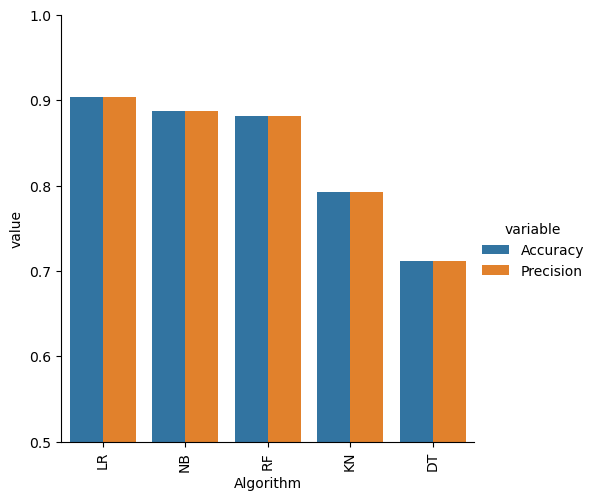

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [146]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [147]:
lrc.fit(X_train,y_train)
y_pred1 = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='micro'))

0.9035087719298246
[[ 26   0  15   4   0]
 [  2  25  10   2   1]
 [  1   4 332   4   1]
 [  0   1   8 212   0]
 [  0   0  12   1  23]]
0.9035087719298246


In [149]:
new_tweet = "At least 45 injured in microbus accident in Pokhara"

# Preprocess the new tweet
preprocessed_tweet = preprocess_text(new_tweet)

# Transform the preprocessed tweet into feature vector
new_tweet_features = cv.transform([preprocessed_tweet])

# Make prediction using the trained logistic regression model
predicted_class = lrc.predict(new_tweet_features)

print('Predicted class:', predicted_class)

Predicted class: ['Accidents and Incidents']


In [151]:
import pickle
pickle.dump(cv, open('vectorizer2.pkl', 'wb'))
pickle.dump(lrc, open('model2.pkl', 'wb'))